In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import ta

In [ ]:
#importando, da bolsa de valores de Frankfurt (FSE), dados das acoes da porsche, bmw e mercedes nos ultimos 365 dias
#valores em Euro
dados_acoes = yf.download(['PAH3.DE', 'BMW.DE', 'MBG.DE'],
                         start='2023-07-16', end='2024-07-16')['Adj Close']

In [ ]:
dados_acoes.to_csv('acoes_german_cars.csv', index=True)

In [2]:
acoes = pd.read_csv('acoes_german_cars.csv', index_col='Date')
acoes.columns = ['BMW', 'MBG', 'PAH']

---

### Adicionando novas colunas ao dataframe para identificar anomalias com mais facilidade (engenharia de features):

In [3]:
#Variação Percentual = [(Preço de Hoje - Preço de Ontem) / Preço de Ontem] * 100
for empresa in ['BMW', 'MBG', 'PAH']:
    acoes[f"Variacao_{empresa}(%)"] = acoes[empresa].pct_change() * 100

In [ ]:
acoes['BMW_variacao(%)'].describe()

In [ ]:
acoes['Mercedes_variacao(%)'].describe()

In [ ]:
acoes['Porsche_variacao(%)'].describe()

In [4]:
#media movel: calcula a media de variacao dentro de espaços de tempo
      
for empresa in ['BMW', 'MBG', 'PAH']:
    acoes[f'MM5_{empresa}'] = acoes[empresa].rolling(window=5).mean()
    
for empresa in ['BMW', 'MBG', 'PAH']:
    acoes[f'MM30_{empresa}'] = acoes[empresa].rolling(window=30).mean()

In [5]:
#Volatilidade (Desvio Padrão Móvel): para entender se a ação gera altos riscos de investimentos, ou se é mais segura

      
for empresa in ["BMW", "MBG", "PAH"]:
    acoes[f"DPM20{empresa}"] = acoes[f"Variacao_{empresa}(%)"].rolling(window=20).std()*100

In [6]:
#índice de força relativa: avalia se um ativo esta para cair ou subir
#RSI acima de 70: ativo está sobrecomprado (pode estar prestes a cair)
#RSI abaixo de 30: ativo está sobrevendido (pode estar prestes a subir)
#no gráfico do RSI como um oscilador que se move entre 0 e 100, as áreas acima de 70 e abaixo de 30 são "zonas de alerta"

for empresa in ["BMW", "MBG", "PAH"]:
    rsi = ta.momentum.RSIIndicator(close = acoes[f'{empresa}'], window=14) # Ajuste a coluna da empresa 
    acoes[f'RSI14_{empresa}'] = rsi.rsi()

In [7]:
#algumas colunas do dataframe estao com valores NaN, devido a criação de novas features
#é necessário removê-las para continuar
acoes = acoes.dropna()

In [8]:
acoes

,BMW,MBG,PAH,Variacao_BMW(%),Variacao_MBG(%),Variacao_PAH(%),MM5_BMW,MM5_MBG,MM5_PAH,MM30_BMW,MM30_MBG,MM30_PAH,DPM20BMW,DPM20MBG,DPM20PAH,RSI14_BMW,RSI14_MBG,RSI14_PAH
Date,,,,,,,,,,,,,,,,,,
2023-08-25,90.882599,62.155529,46.137062,-0.278976,0.014934,-0.020542,92.410017,62.500630,46.379739,97.489187,65.032617,49.059930,146.689860,91.555477,78.935628,27.256259,30.742272,15.573459
2023-08-28,90.967346,62.554436,46.336136,0.093249,0.641788,0.431483,91.912805,62.480221,46.351302,97.169012,64.875218,48.917737,147.607654,92.746525,80.667158,27.820264,35.254989,20.747435
2023-08-29,91.890205,62.925514,46.942825,1.014495,0.593209,1.309323,91.513528,62.487642,46.427138,96.870182,64.731735,48.785023,102.427408,82.161013,89.612949,33.836192,39.222274,34.018470
2023-08-30,91.588867,62.628654,47.047104,-0.327933,-0.471764,0.222140,91.293173,62.482076,46.521934,96.558168,64.596291,48.645673,101.036419,81.776491,87.905045,32.872748,37.255529,36.002143
2023-08-31,91.504112,62.656483,46.990223,-0.092538,0.044434,-0.120902,91.366626,62.584123,46.690670,96.228263,64.471980,48.504427,92.090374,81.524290,87.291762,32.591656,37.571551,35.377359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-09,87.699997,63.150002,42.669998,0.665742,-3.425597,-0.350307,87.824001,65.050002,42.781999,89.509334,64.801667,44.288475,127.123012,121.857314,150.723393,40.848083,38.553662,37.177107
2024-07-10,89.500000,63.950001,42.770000,2.052455,1.266824,0.234362,88.036000,64.780001,42.798000,89.432000,64.751001,44.150013,135.095518,124.605947,146.217785,49.924004,44.182841,38.736454
2024-07-11,91.000000,64.000000,43.250000,1.675978,0.078185,1.122281,88.603999,64.392001,42.866000,89.378667,64.686667,44.008591,129.938818,117.647517,72.252528,55.984771,44.524904,45.702983


---

### Análise Exploratória

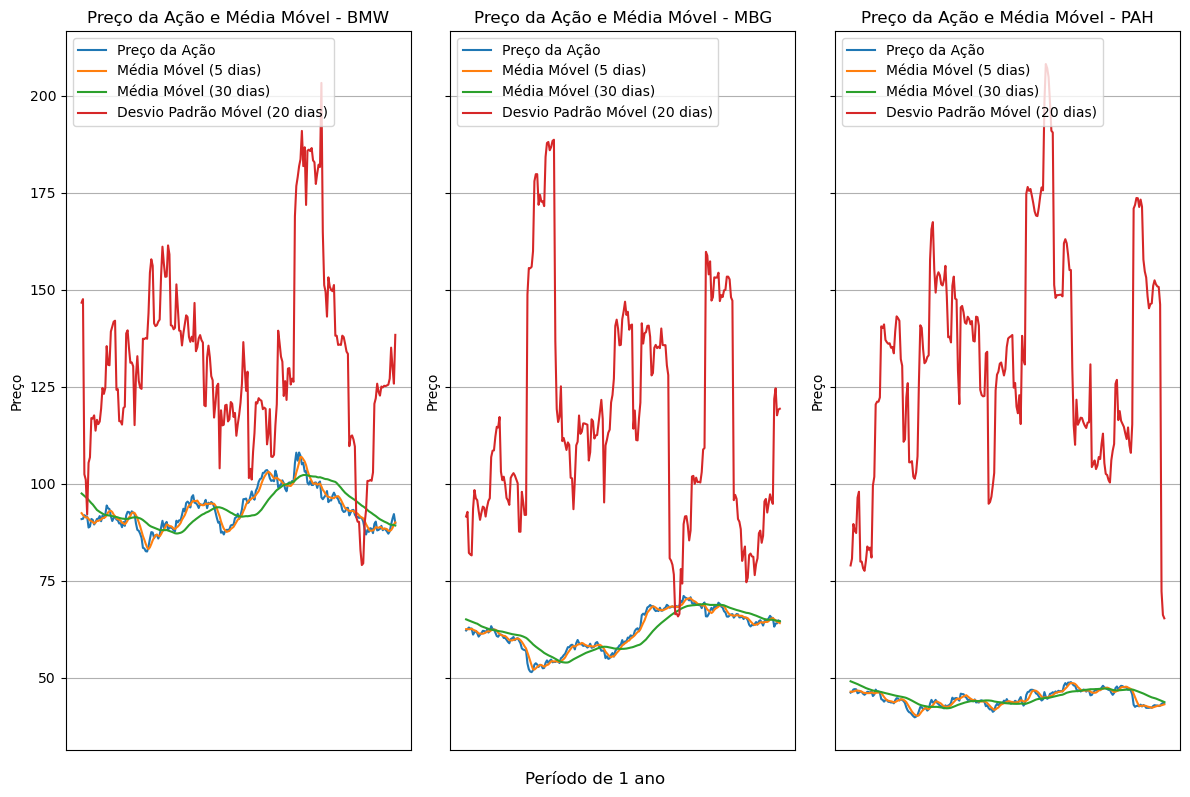

In [26]:
empresas = ['BMW', 'MBG', 'PAH']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 8), sharey=True)
cores = ['powderblue', 'aliceblue', 'azure']

for i, empresa in enumerate(empresas):
    plt.sca(axes[i])  # Define o subplot atual
    plt.plot(acoes[empresa], label='Preço da Ação')
    plt.plot(acoes[f"MM5_{empresa}"], label='Média Móvel (5 dias)')
    plt.plot(acoes[f"MM30_{empresa}"], label='Média Móvel (30 dias)')
    #plt.xlabel('Período de 1 ano')
    plt.xticks([])
    plt.ylabel('Preço')
    plt.title(f'Preço da Ação e Média Móvel - {empresa}')
    plt.legend(loc='upper left')
    plt.grid()

fig.supxlabel('Período de 1 ano')
plt.tight_layout()
plt.show()

Se a linha do preço da ação oscilar muito em torno da linha da média móvel, é um período de incerteza no mercado. Quando as duas linhas andam juntas, temos uma estabilidade na ação, mesmo que subindo ou descendo de valor. Todas começaram e terminaram o período da análise com praticamente o mesmo valor por ação

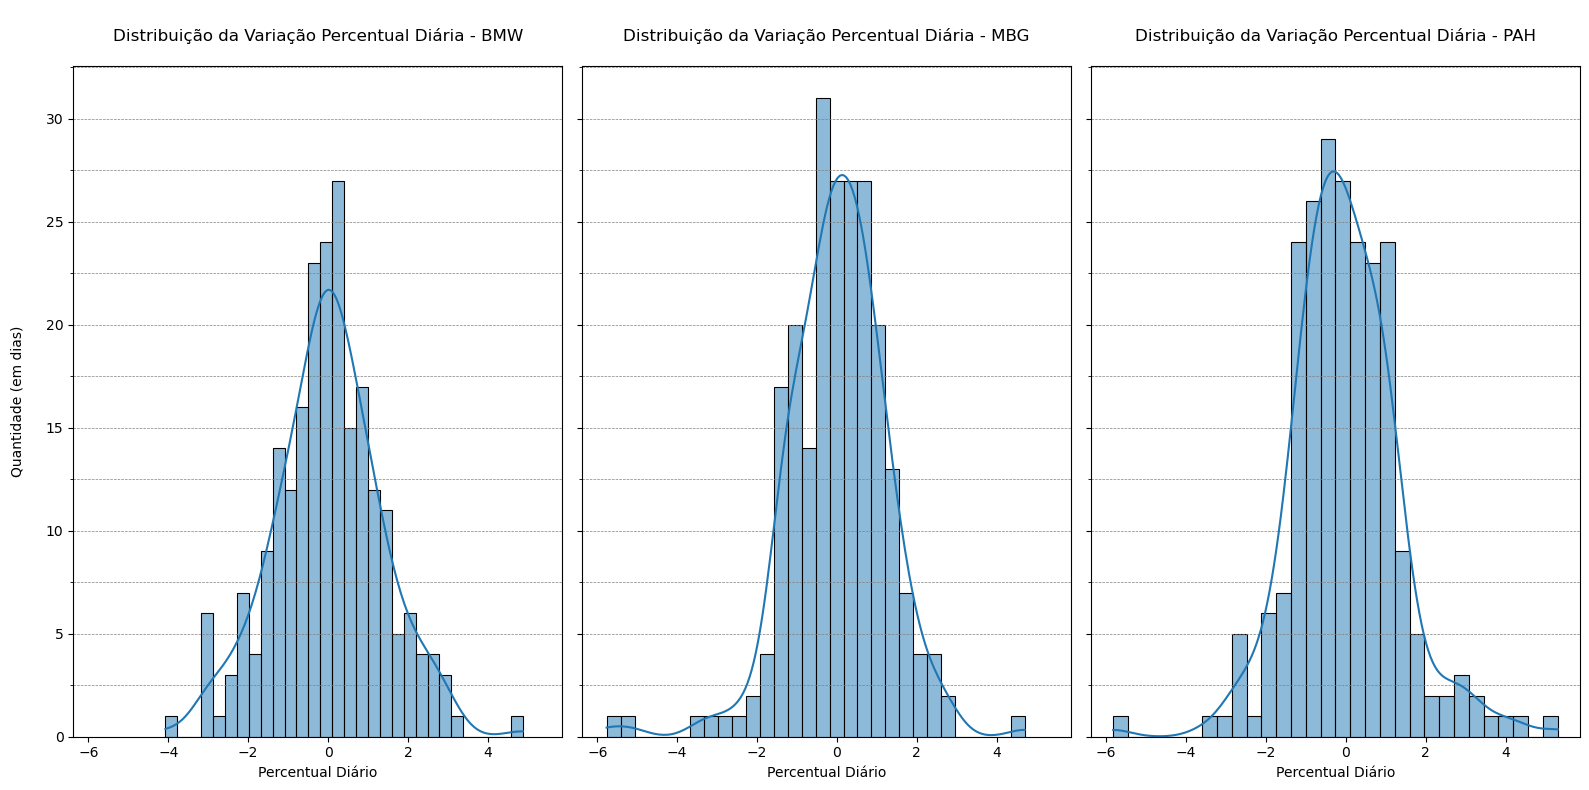

In [23]:
empresas = ['BMW', 'MBG', 'PAH']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 8), sharex=True, sharey=True)

for i, empresa in enumerate(empresas):
    plt.sca(axes[i])  # Define o subplot atual
    sns.histplot(acoes[f'Variacao_{empresa}(%)'], bins=30, kde=True)
    plt.title(f"\nDistribuição da Variação Percentual Diária - {empresa}\n")
    plt.xlabel('Percentual Diário')
    plt.ylabel('Quantidade (em dias)\n')
    plt.yticks(np.arange(0, 35, 2.5), minor=True)
    plt.grid(axis='y', which='both', color='grey', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

Estes gráficos nos indicam a frequência de diferentes variações diárias. Uma ação estável se aproxima de uma distribuição normal, enquanto ações voláteis apresentam gráficos mais achatados. No eixo X, a esquerda do 0 temos as quedas e, a direita, as subidas

Ao contrário da Mercedes e da Porsche, a BMW não teve quedas bruscas

In [ ]:
acoes

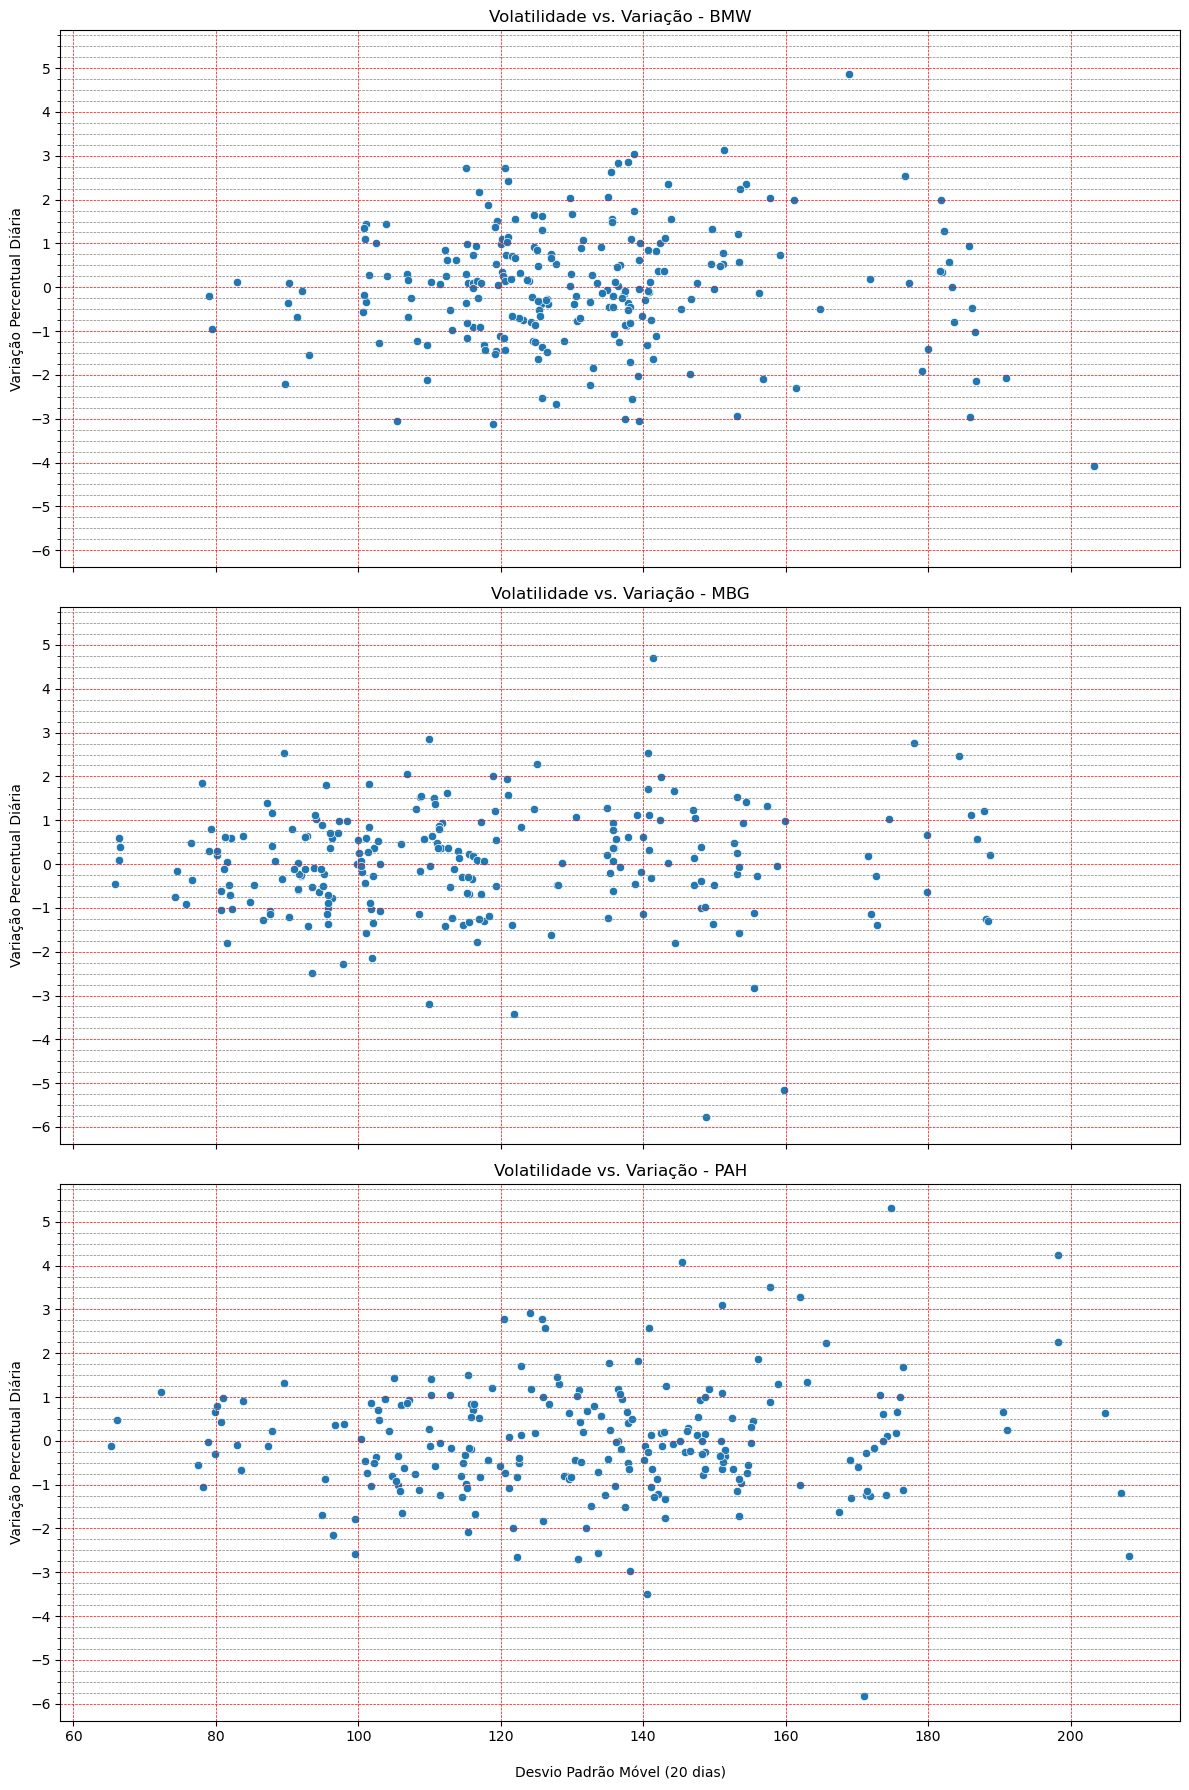

In [27]:
empresas = ['BMW', 'MBG', 'PAH']
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 18), sharex=True, sharey=True)

for i, empresa in enumerate(empresas):
    plt.sca(axes[i])
    sns.scatterplot(x=f"DPM20{empresa}", y=f'Variacao_{empresa}(%)', data=acoes)
    plt.title(f"Volatilidade vs. Variação - {empresa}")
    plt.xlabel('\nDesvio Padrão Móvel (20 dias)')
    plt.ylabel('Variação Percentual Diária')
    plt.yticks(np.arange(-6, 6, 1), minor=False)
    plt.yticks(np.arange(-6, 6, 0.25), minor=True)
    plt.grid(which='minor', color='grey', linestyle='--', linewidth=0.5)
    plt.grid(which='major', color='red', linestyle='--', linewidth=0.5)
    
plt.tight_layout()
plt.show()

A BMW possui uma maior concentração de pontos por região no gráfico, o que indica uma volatidade menor que as outras. Além disso, como já visto, ela é a empresa com menos quedas (menos outliers abaixo de 0 no eixo y)

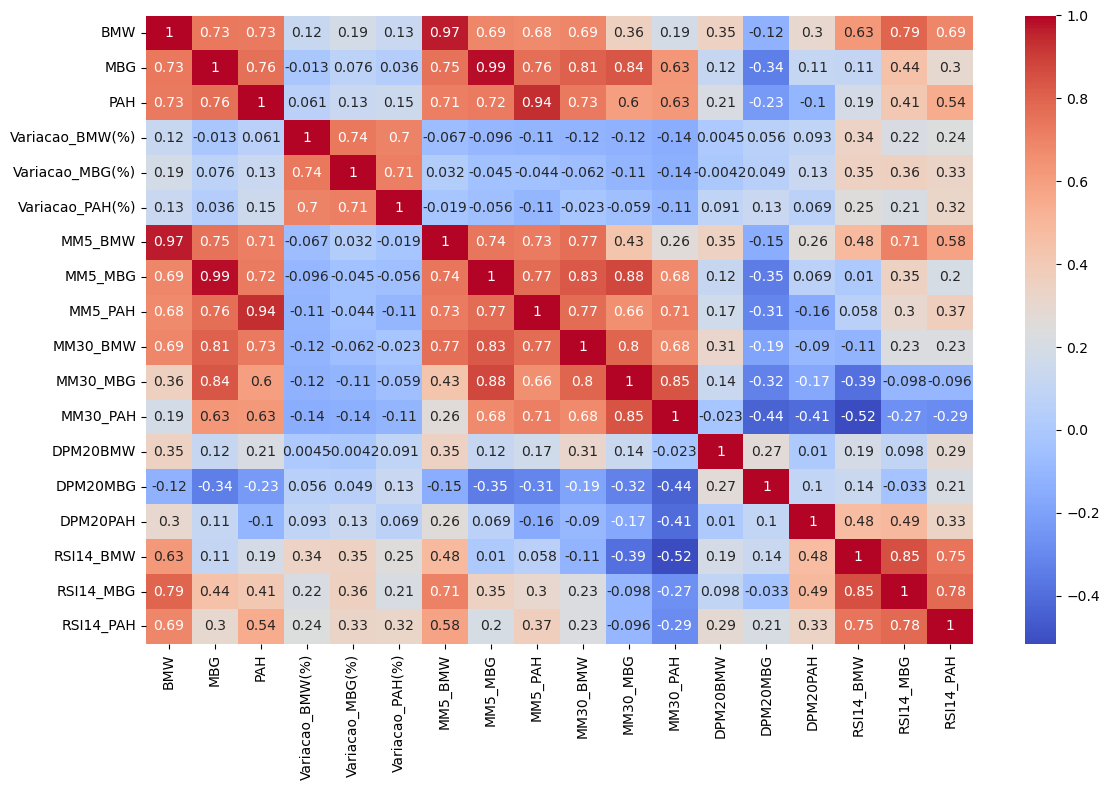

In [32]:
#correlacoes

plt.figure(figsize=(12, 8))
sns.heatmap(acoes.corr(), annot=True, cmap="coolwarm")
plt.tight_layout()
plt.show()

----

### Detecção de Anomalias com o Algoritmo 'Isolation Forest'

In [35]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

In [36]:
acoes.columns

Index(['BMW', 'MBG', 'PAH', 'Variacao_BMW(%)', 'Variacao_MBG(%)',
       'Variacao_PAH(%)', 'MM5_BMW', 'MM5_MBG', 'MM5_PAH', 'MM30_BMW',
       'MM30_MBG', 'MM30_PAH', 'DPM20BMW', 'DPM20MBG', 'DPM20PAH', 'RSI14_BMW',
       'RSI14_MBG', 'RSI14_PAH'],
      dtype='object')

In [37]:
#colunas relevantes para a detecção de anomalias
features = [
    'Variacao_BMW(%)', 'Variacao_MBG(%)', 'Variacao_PAH(%)', 
    'MM5_BMW', 'MM5_MBG', 'MM5_PAH', 
    'MM30_BMW', 'MM30_MBG', 'MM30_PAH', 
    'DPM20BMW', 'DPM20MBG', 'DPM20PAH', 
    'RSI14_BMW', 'RSI14_MBG', 'RSI14_PAH'
]

X = acoes[features]

#escalonando os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 

In [43]:
X_scaled

array([[-2.09143913e-01, -7.19914492e-03, -1.79295816e-03, ...,
        -1.67066331e+00, -1.34210958e+00, -2.67249374e+00],
       [ 6.73078797e-02,  5.01468860e-01,  3.36766783e-01, ...,
        -1.62544039e+00, -1.02533731e+00, -2.22628850e+00],
       [ 7.51518162e-01,  4.62048795e-01,  9.94253678e-01, ...,
        -1.14307327e+00, -7.46851870e-01, -1.08179035e+00],
       ...,
       [ 1.24280206e+00,  4.41262515e-02,  8.54162611e-01, ...,
         6.32836651e-01, -3.74631341e-01, -7.41143201e-02],
       [ 9.61114818e-01,  9.69650204e-01,  3.77259491e-01, ...,
         9.61052122e-01, -1.11334521e-02,  1.64005579e-01],
       [-1.90341846e+00, -4.20163261e-01, -7.25751504e-02, ...,
         1.57164792e-01, -1.49323773e-01,  1.10210264e-01]])

In [44]:
#
# contamination: proporção estimada de anomalias nos seus dados 
#  random state: garante a reprodutibilidade dos resultados

modelo_if = IsolationForest(contamination=0.05, random_state=42)

# Treine o modelo com os dados escalonados
modelo_if.fit(X_scaled)

IsolationForest(contamination=0.05, random_state=42)

In [46]:
# previsões (-1 para anomalias e 1 para dados normais)
acoes['Anomalia'] = modelo_if.predict(X_scaled)

# Adiciona os "outlier scores" ao DataFrame 
# Quanto maior o score, maior a chance de ser uma anomalia
acoes['Scores'] = modelo_if.decision_function(X_scaled)

In [53]:
acoes['Anomalia'].value_counts()

 1    214
-1     12
Name: Anomalia, dtype: int64

In [55]:
acoes.loc[acoes['Anomalia'] == -1]

,BMW,MBG,PAH,Variacao_BMW(%),Variacao_MBG(%),Variacao_PAH(%),MM5_BMW,MM5_MBG,MM5_PAH,MM30_BMW,MM30_MBG,MM30_PAH,DPM20BMW,DPM20MBG,DPM20PAH,RSI14_BMW,RSI14_MBG,RSI14_PAH,Anomalia,Scores
Date,,,,,,,,,,,,,,,,,,,,
2023-09-01,88.707291,61.097958,45.975910,-3.056498,-2.487412,-2.158561,90.931564,62.372609,46.658440,95.808268,64.306851,48.330635,105.394761,93.526665,96.423060,24.995988,28.817477,26.534359,-1,-0.013914
2023-10-26,83.462067,53.657848,40.477760,-3.009415,-5.767351,-1.134516,86.520683,56.489170,41.256980,90.644977,59.995855,44.075573,137.404250,148.799028,105.825435,26.224130,18.125127,21.968510,-1,-0.028146
2023-10-31,82.520378,51.422104,39.956387,-0.091216,-0.269885,0.476765,83.592023,53.145760,40.240771,89.762298,58.967042,43.489736,137.384574,155.931395,102.918741,24.419262,14.381215,22.126987,-1,-0.007605
2023-11-01,83.810501,51.923058,40.326088,1.563399,0.974199,0.925262,83.143779,52.141994,40.117537,89.409478,58.588542,43.270125,143.972701,159.952765,107.083828,31.895554,18.930789,27.235060,-1,-0.031658
2023-11-02,85.778625,53.360985,41.368839,2.348303,2.769342,2.585798,83.607091,52.082622,40.295753,89.146746,58.282094,43.102021,154.396691,178.004179,126.210163,41.416056,30.368326,39.324307,-1,-0.031103
2024-02-22,98.952888,66.116783,45.520893,0.747844,4.701046,5.307027,97.581786,63.292879,44.040182,92.254325,58.867469,43.292245,120.708961,141.368982,174.766672,67.706580,78.665283,60.906092,-1,-0.001458
2024-03-12,103.378838,68.018555,46.279255,2.713331,1.270716,4.249400,101.412582,67.447096,44.906615,97.991108,63.803731,44.729663,115.086920,134.957784,198.197484,68.212479,71.254683,58.940216,-1,-0.000954
2024-04-03,105.328133,68.565903,47.947662,4.875758,0.598887,3.287727,101.359850,68.307997,46.806321,100.798603,67.462867,45.750613,168.958890,66.442096,161.999771,67.198830,64.642479,66.022986,-1,-0.026865
2024-04-04,108.011955,69.827560,48.592270,2.548059,1.840066,1.344398,102.892923,68.645679,47.202567,101.202902,67.725405,45.943996,176.766896,77.998184,163.055370,72.071749,71.402313,69.005865,-1,-0.009394


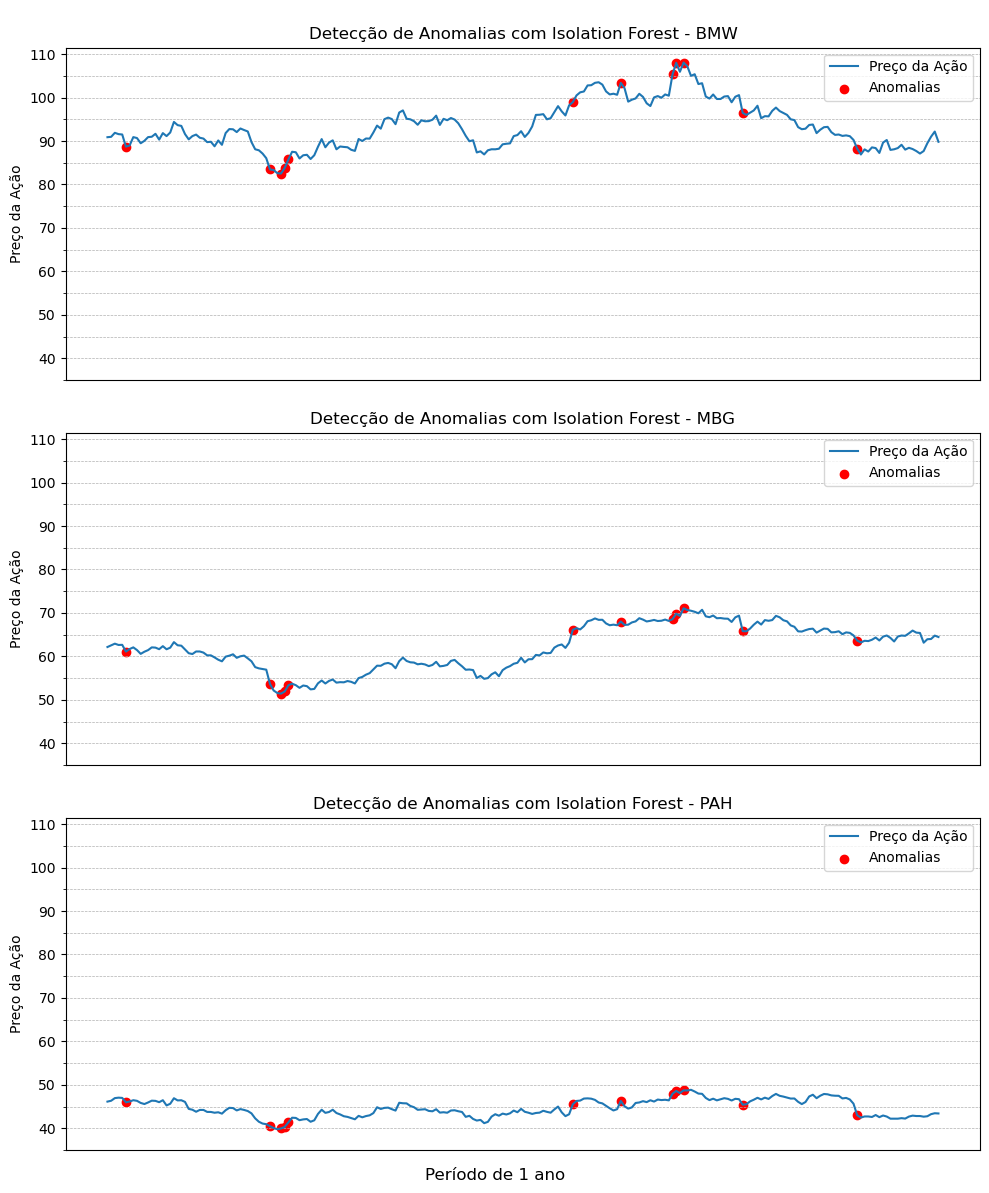

In [70]:
# Plota o preço das ações

empresas = ['BMW', 'MBG', 'PAH']
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 12), sharex=True, sharey=True)

for i, empresa in enumerate(empresas):
    plt.sca(axes[i])
    plt.plot(acoes.index, acoes[f'{empresa}'], label='Preço da Ação')

    # Destaca as anomalias detectadas 
    anomalias = acoes[acoes['Anomalia'] == -1]
    plt.scatter(anomalias.index, anomalias[f'{empresa}'], color='red', label='Anomalias')
    plt.xticks([])
    plt.yticks(np.arange(35, 110, 5), minor=True)
    plt.ylabel('Preço da Ação')
    plt.title(f'\nDetecção de Anomalias com Isolation Forest - {empresa}')
    plt.legend()
    plt.grid(which='both', linestyle='--', linewidth=0.5)
    
fig.supxlabel('Período de 1 ano')
plt.tight_layout()
plt.show()

Temos dois clusters (agrupamentos) de anomalias no grafico, um em torno do final de outubro/inicio de novembro de 2023, enquanto o outro é no começo de abril de 2024

No período do primeiro cluster, foi iniciado um recall para Mercedes E 300 e um recall para BMW X3 e X4. Tais acontecimentos negativos podem explicar a queda brusca nas ações das empresas citadas, enquanto a Porsche permaneceu estável

No segundo período, vemos que a BMW teve uma grande alta, enquanto as outras obtiveram uma pequena alta. No meio de março de 2024, as três empresas participaram do Salão Internacional do Automóvel de Genebra. Presumo que este evento trouxe mais destaque e mídia positiva para a BMW